# When will we ran out of dist according to DataDog stats?

In [46]:
import time
from os import getenv
from datadog import initialize, api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [47]:
(DD_APP_KEY, DD_API_KEY) = (getenv("DD_APP_KEY"), getenv("DD_API_KEY"))
initialize(api_key=DD_API_KEY, app_key=DD_APP_KEY)
now = int(time.time())

In [48]:
results = api.Metric.query(start=now - 3600*24, end=now, query='system.disk.in_use{host:a1.univizor.si}')
pointlist = results['series'][0]['pointlist']

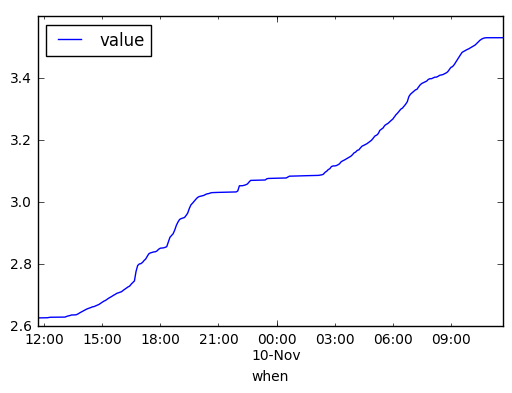

In [49]:
df = pd.DataFrame(pointlist, columns=['when', 'value'])
df['when'] = pd.to_datetime(df['when'],unit='ms')
df['value'] = df['value']*100
df.index = df['when']
df.pop('when')
df.resample('5Min').max().plot()

In [45]:
# df.to_csv("out.csv")